In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
device = torch.device("cuda")

In [3]:
torch.cuda.is_available()

True

In [4]:
transform = transforms.Compose([
    transforms.RandomAffine(degrees = 0, translate = (0.2, 0.2), scale=(0.9, 1.2)),
    transforms.ToTensor()]
)

In [5]:
# Загрузка датасета
train_data = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_data = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [6]:
# DataLoader
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=len(test_data), shuffle=True)

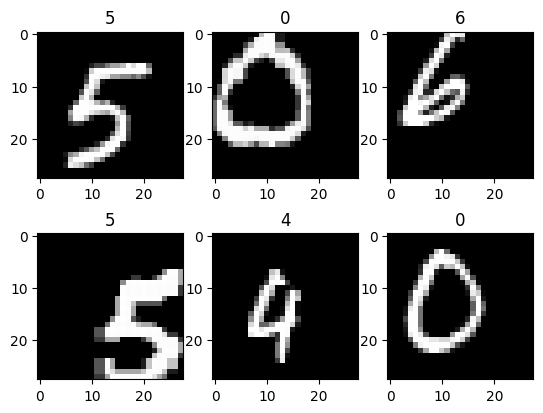

In [7]:
# Show samples
examples = iter(train_loader)
example_image, lable = next(examples)
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.title(lable[i].item())
    plt.imshow(example_image[i][0], cmap='gray')
plt.show()

In [8]:
class Flatten(nn.Module):
    def forward(self, input):
        return input.view(input.size(0), -1)

In [9]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = Flatten()
        self.fc1 = nn.Linear(28*28, 500)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(500, 250)
        self.fc3 = nn.Linear(250, 100)
        self.fc4 = nn.Linear(100, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        x = F.softmax(x, -1)
        return x

In [10]:
net = SimpleNN()
loss_fn = nn.CrossEntropyLoss()
lr = 0.0001
optimizer = torch.optim.Adam(net.parameters(), lr = lr)

In [11]:
from sklearn.metrics import accuracy_score

In [ ]:
loss_list = []
accuracy_list = []
epochs = 30
for epoch in tqdm(range(epochs)):
    running_loss = 0
    train_dataiter = iter(train_loader)
    current_loss = 0
    for i, batch in enumerate(tqdm(train_dataiter)):
        X_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        current_loss += loss
    loss_list.append(current_loss.item())
    test_dataiter = iter(test_loader)
    images, labels = next(test_dataiter)
    ac = accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis = 1))
    print('accuracy:', ac)
    accuracy_list.append(ac)

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.6385


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.7407


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.7837


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8069


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8203


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.824


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8315


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8364


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8403


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8428


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8496


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8496


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8536


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8553


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8511


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8549


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.859


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8571


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8562


  0%|          | 0/1875 [00:00<?, ?it/s]

accuracy: 0.8605


  0%|          | 0/1875 [00:00<?, ?it/s]

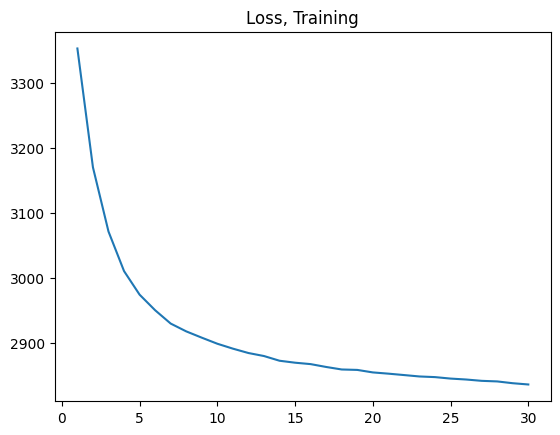

In [14]:
plt.plot(range(1, epochs+1), loss_list)
plt.title('Loss, Training')
plt.show()

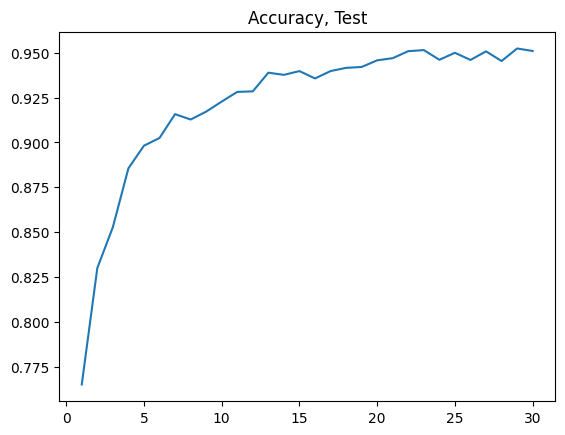

In [15]:
plt.plot(range(1, epochs+1), accuracy_list)
plt.title('Accuracy, Test')
plt.show()

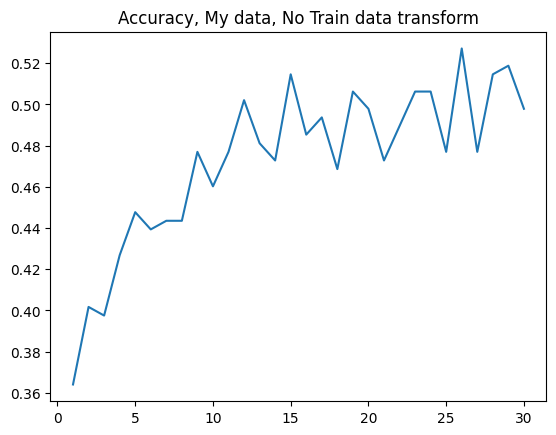

In [278]:
plt.plot(range(1, epochs+1), mydata_accuracy_list)
plt.title('Accuracy, My data, No Train data transform')
plt.show()

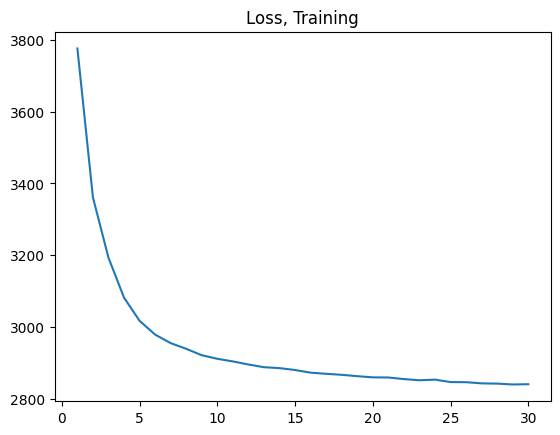

In [293]:
plt.plot(range(1, epochs+1), loss_list)
plt.title('Loss, Training')
plt.show()

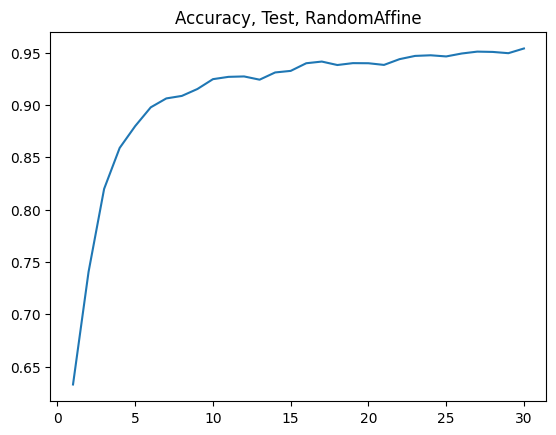

In [294]:
plt.plot(range(1, epochs+1), accuracy_list)
plt.title('Accuracy, Test, RandomAffine')
plt.show()

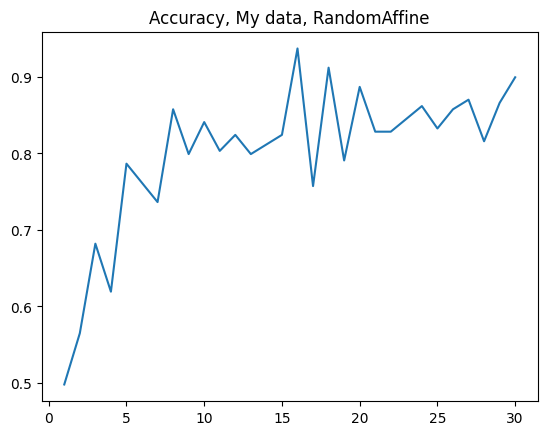

In [295]:
plt.plot(range(1, epochs+1), mydata_accuracy_list)
plt.title('Accuracy, My data, RandomAffine')
plt.show()

In [2]:
test_dataiter = iter(test_loader)
images, labels = next(test_dataiter)

NameError: name 'test_loader' is not defined

In [1]:
images.shape

NameError: name 'images' is not defined

2

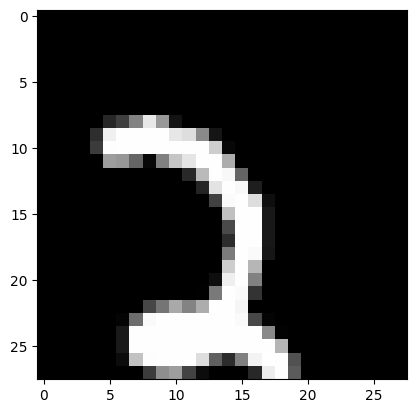

In [297]:
plt.imshow(images[242][0], cmap='gray')
predict_classes = net.forward(images[242]).detach().numpy()
np.argmax(predict_classes)

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [22]:
accuracy_score(labels.numpy(), np.argmax(net.forward(images).detach().numpy(), axis = 1))

0.8656

In [1]:
confusion = confusion_matrix(labels.numpy(), np.argmax(cnn.forward(sounds).detach().numpy(), axis = 1))
display = ConfusionMatrixDisplay(confusion)

NameError: name 'confusion_matrix' is not defined

In [16]:
import cv2
import urllib
import os
from PIL import Image

In [17]:
my_images = []
my_labels = []
tensort = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.ToTensor()])
imgs_list = os.listdir('img')
for i in imgs_list:
    my_labels.append(int(i[0]))
    f = open('img/'+i, 'r')
    name = f.read()
    resp = urllib.request.urlopen(name)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
    image = cv2.bitwise_not(image)
    im_pil = Image.fromarray(image)
    img = tensort(im_pil)
    my_images.append(img)

In [18]:
def MyListAccuracy(my_labels, my_images):
    predictions = []
    for img in my_images:
        predictions.append(np.argmax(net.forward(img).detach().numpy()))
    return accuracy_score(np.array(my_labels), np.array(predictions))

In [299]:
MyListAccuracy(my_labels, my_images)

0.899581589958159